In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import style
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')
style.use("ggplot")
sns.set(rc={'figure.figsize':(11.7,8.27)})
from platform import python_version

print(python_version())

3.8.12


## Lecture des bases de données

In [3]:
# Nombre de décès par sexe
df1 = pd.read_csv("/users/guillaumedenis/Programmation/Datasets/DecesSemaine_1.csv", delimiter=";")
# Nombre de décès par âge
df2 = pd.read_csv("/users/guillaumedenis/Programmation/Datasets/DecesSemaine_1.csv", delimiter=";")

In [4]:
# On transforme les colonnes en nom adéquat (df1)
new_cols = ["annee","statut","sexe"]
for i in range(1,54):
    new_cols.append(str(i))
    
df1.columns=new_cols

# On transforme les colonnes en nom adéquat (df2)
new_cols = ["annee","statut","age"]
for i in range(1,54):
    new_cols.append(str(i))
    
df2.columns=new_cols

In [5]:
# On melt pour avoir les variables dans un bon format 
df1=df1.melt(id_vars=["annee", "statut","sexe"], 
        var_name="semaine", 
        value_name="value")
df1.dropna(inplace=True)

df2=df2.melt(id_vars=["annee","statut","age"], 
        var_name="semaine", 
        value_name="value")
df2.dropna(inplace=True)

# On met les variables values dans le bon forma
df1["value"]=df1["value"].str.replace(" ","")
df1["value"]=pd.to_numeric(df1["value"])


df2["value"]=df2["value"].str.replace(" ","")
df2["value"]=pd.to_numeric(df2["value"])

# Pour df1, on conserve uniquement à partir de 2011
df1=df1[df1["annee"]>=2011]

## Représentations graphiques

### Nombre de décès par année

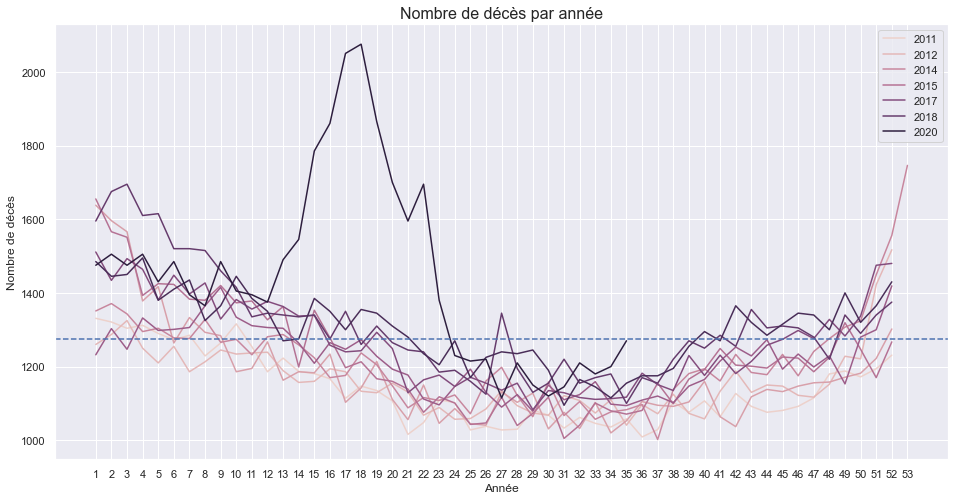

In [6]:
# Moyenne mobile
moyenne_mob = np.mean(df1["value"][(df1["sexe"]=="Total") & (df1["annee"]>=2016) & (df1["annee"]<=2019)])
# Graphique du nombre de décès par année
sns.set_theme(style="dark")
graph1= df1[df1["sexe"]=="Total"]

sns.set(rc={'figure.figsize':(16,8.)})
sns.lineplot(x="semaine", y="value", hue="annee", data=graph1, ci=None)
plt.legend(loc='best')
plt.xlabel("Année")
plt.ylabel("Nombre de décès")
plt.title("Nombre de décès par année", size=16)
plt.axhline(y=moyenne_mob, color='b', linestyle='--')


### Nombre de décès par année par sexe

([<matplotlib.axis.XTick at 0x119976a90>,
 <a list of 14 Text xticklabel objects>)

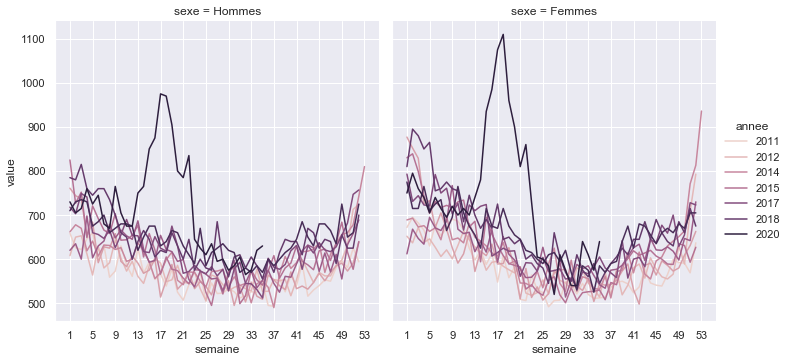

In [7]:
# Graphique du nombre de décès par année par sexe
graph2= df1[df1["sexe"]!="Total"]

sns.set(rc={'figure.figsize':(20,8)})
sns.relplot(x="semaine", y="value", hue="annee", col="sexe", kind="line", data=graph2, ci=None)
plt.xticks(range(0,54,4), range(1,54,4))

À partir des deux graphiques ci-dessus, on constate qu'il y a beaucoup plus de morts en 2020 que pour les autres années. Cela est d'autant plus vrai pour les femmes que les hommes. Examinons maintenant l'évolution du nombre de morts par sexe et cumulatif.

### Nombre de décès par sexe (et total) cumulatif

Text(0, 0.5, 'Nombre de décès')

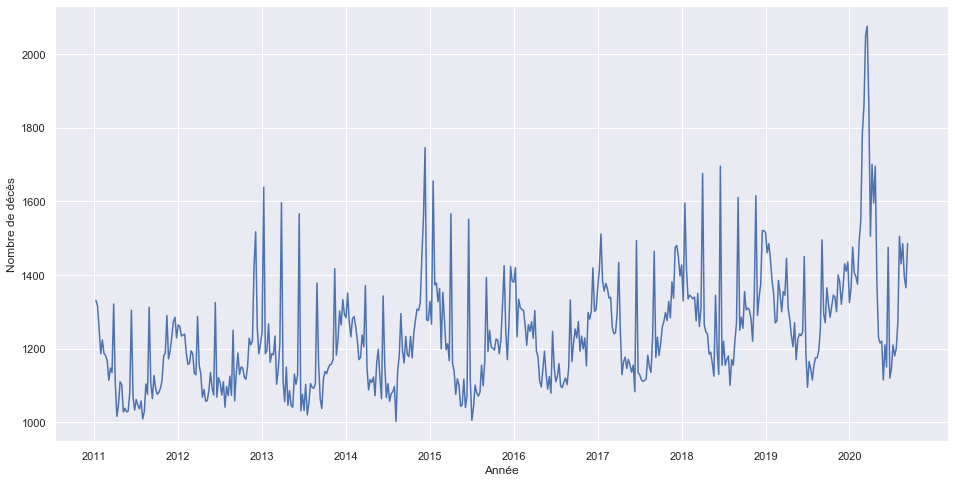

In [8]:
# Création de la variable semaine_cum pour le graphique 1
graph1.sort_values(by=["annee","semaine"], inplace=True)
graph1["semaine_cum"]=range(1,graph1.shape[0]+1)
graph1.reset_index(drop=True, inplace=True)

# Création de la même variable
graph2.sort_values(by=["sexe","annee","semaine"], inplace=True)
# graph2_male=graph2[graph2["sexe"]=="Hommes"]
# graph2_female=graph2[graph2["sexe"]=="Femmes"]
graph2["semaine_cum"]=0
graph2["semaine_cum"][graph2["sexe"]=="Hommes"]=range(1, graph2[graph2["sexe"]=="Hommes"].shape[0]+1)
graph2["semaine_cum"][graph2["sexe"]=="Femmes"]=range(1, graph2[graph2["sexe"]=="Femmes"].shape[0]+1)

sns.set(rc={'figure.figsize':(16,8.)})
sns.lineplot(x="semaine_cum", y="value", data=graph1, ci=None)
plt.xticks(range(0,graph1.shape[0]+1,52), range(2011, 2021,1))
plt.xlabel("Année")
plt.ylabel("Nombre de décès")

Text(0, 0.5, 'Nombre de décès')

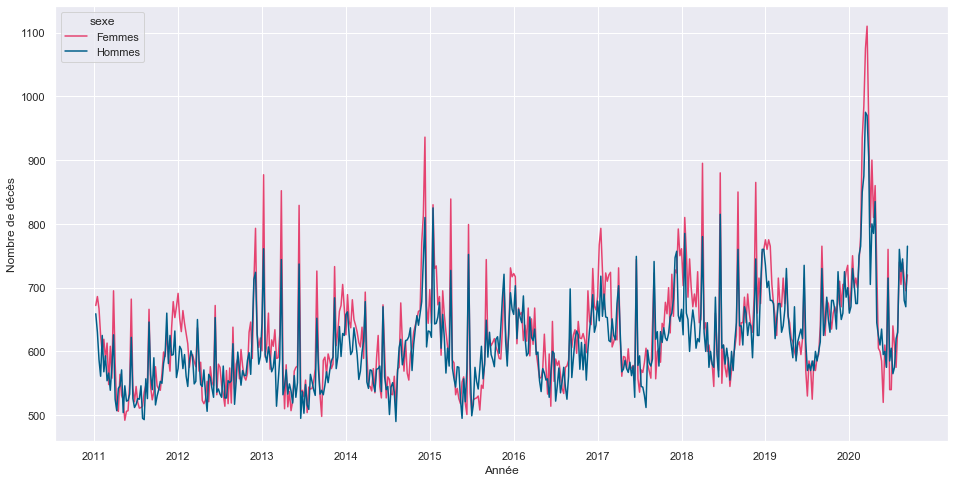

In [9]:
sns.set(rc={'figure.figsize':(16,8.)})
sns.lineplot(x="semaine_cum", y="value", hue="sexe", data=graph2, ci=None, palette=["#e54370", "#005f89"])
plt.xticks(range(0,int((graph2.shape[0]+1)/2),52), range(2011, 2022,1))
plt.xlabel("Année")
plt.ylabel("Nombre de décès")

### Nombre de décès par groupe d'âge

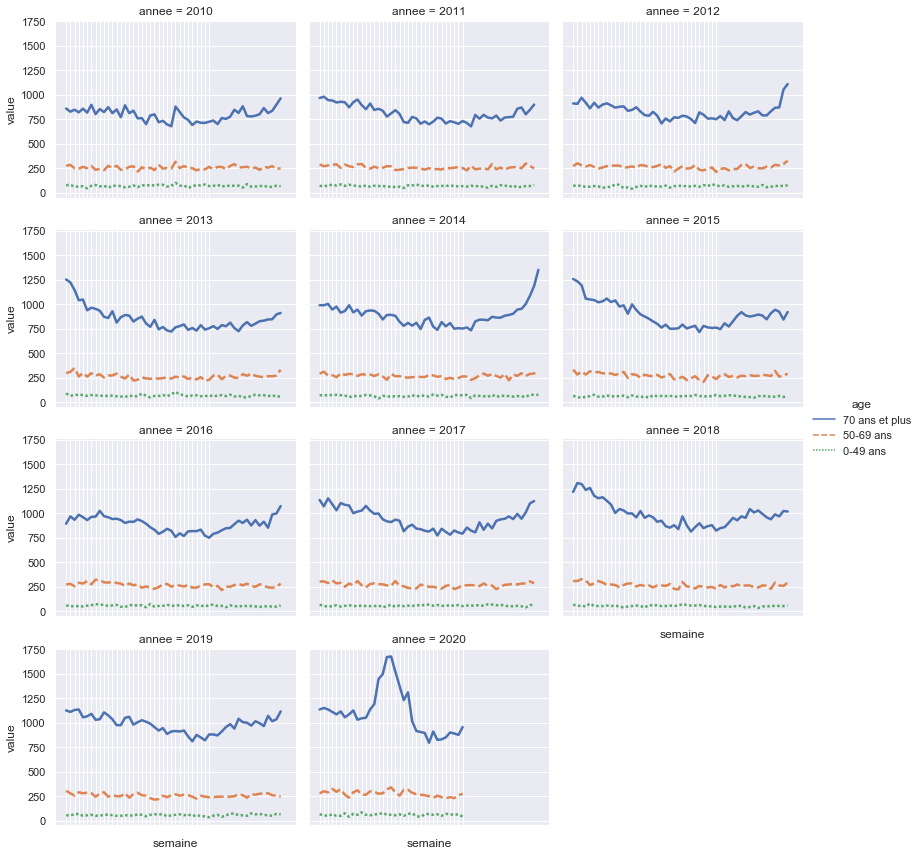

In [32]:
graph3=df2[df2["age"]!="Total"]

g = sns.relplot(x="semaine", y="value", hue="age", style="age",
            col="annee", col_wrap=3,
            height=3, aspect=1.25, linewidth=2.5,
            kind="line", data=graph3)

g.set(xticklabels=[])

On constate que la presque totalité des décès supplémentaires en 2020 ont été dans le groupe 70 ans et plus.